# Group 1:
# Gavin Stone, Isaac Adams, Kaden Hicklin, Owen Miller, Samuel Shevlin, Sullivan Gleason


1. Create a grid of scatter plots with each one representing the sq_ft distribution in a single zipcode. please also include ticks, labels and legend in your plot

2. Create a grid of scatter plots with each one representing the price distribution in a single zipcode, annotate the highest and lowest price ones for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

3. Create a grid of bar plots with each one representing a single zipcode and in that zipcode the sq_ft distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

4. Create a grid of bar plots with each one representing a single zipcode and in that zipcode the price distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

5. Plot the average price distribution based on zipcode for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

6. Plot the average price distribution based on city for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

95603
95608
95610
95614
95619
95621
95623
95624
95626
95628
95630
95631
95632
95633
95635
95648
95650
95655
95660
95661
95662
95663
95667
95670
95673
95677
95678
95682
95683
95690
95691
95693
95722
95726
95742
95746
95747
95757
95758
95762
95765
95811
95814
95815
95816
95817
95818
95819
95820
95821
95822
95823
95824
95825
95826
95827
95828
95829
95831
95832
95833
95834
95835
95838
95841
95842
95843
95864


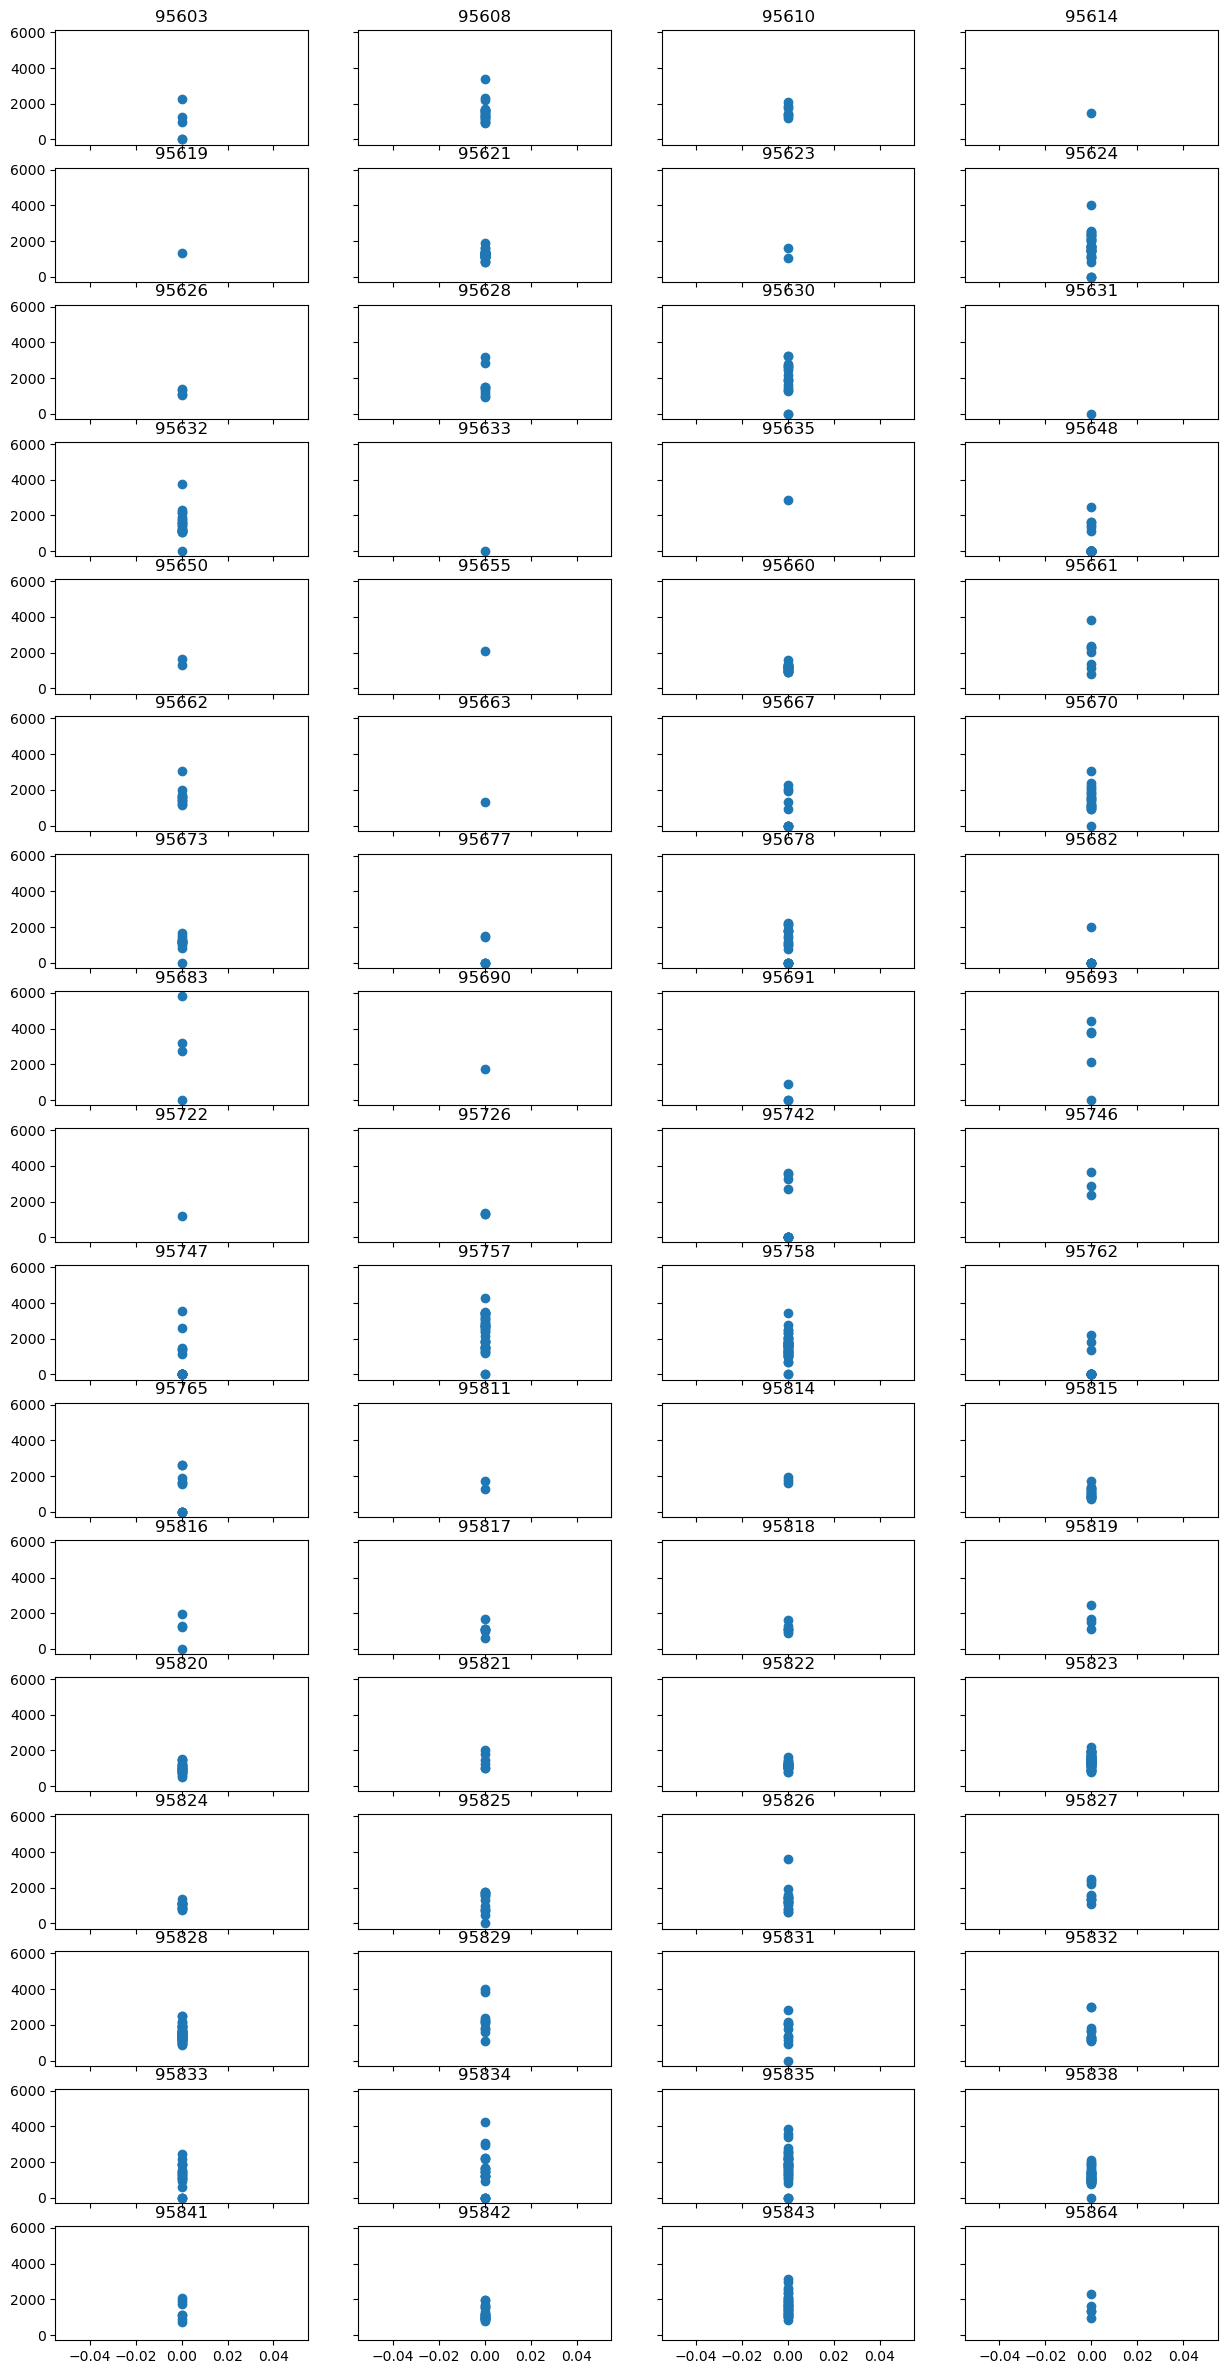

In [1]:
#1. 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

df = pd.read_csv('Sacramentorealestatetransactions.csv')
sq=df.groupby(['zip'])
df['zip'].nunique()
for group in sq:
  print(group[1].iloc[0]['zip'])
fig, axes = plt.subplots(17, 4, sharex=True, sharey=True, figsize=(15, 30))
for i, zip_group in enumerate(sq):
    row = i // 4
    col = i % 4
    axes[row, col].scatter([0]*len(zip_group[1]['sq__ft']), zip_group[1]['sq__ft'])
    axes[row, col].set_title(zip_group[1].iloc[0]['zip'])
plt.show()

C:\Users\eyezack\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


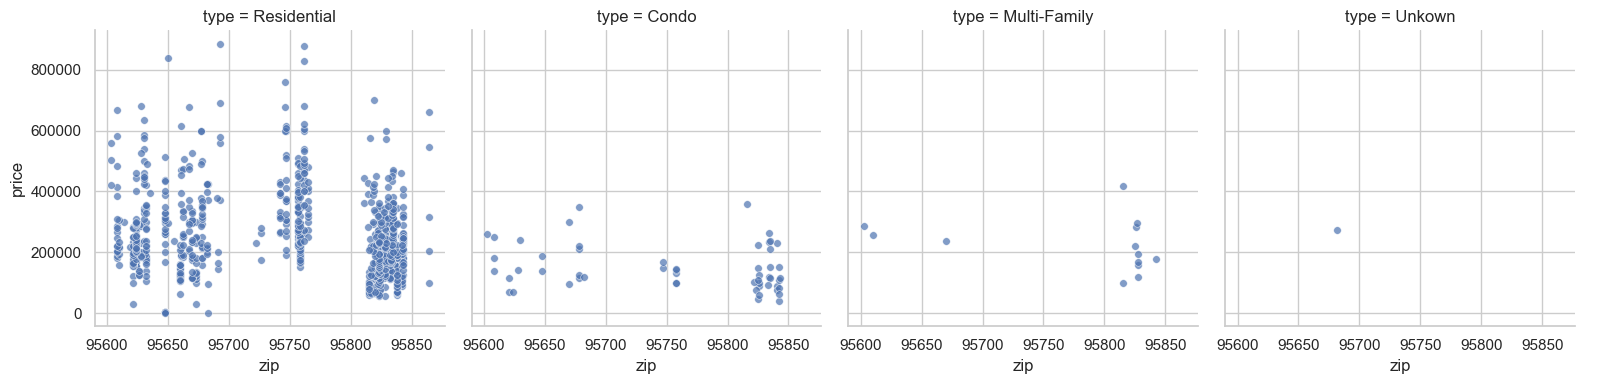

In [49]:
#2. 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

df = pd.read_csv('Sacramentorealestatetransactions.csv')
df = df[df["price"] > 0]

g = sns.FacetGrid(df, col="type", height=4)
g.map(sns.scatterplot, "zip", "price", alpha=0.7, s=30)
g.set_axis_labels=("Zip Code", "Price")
g.add_legend()

plt.show()

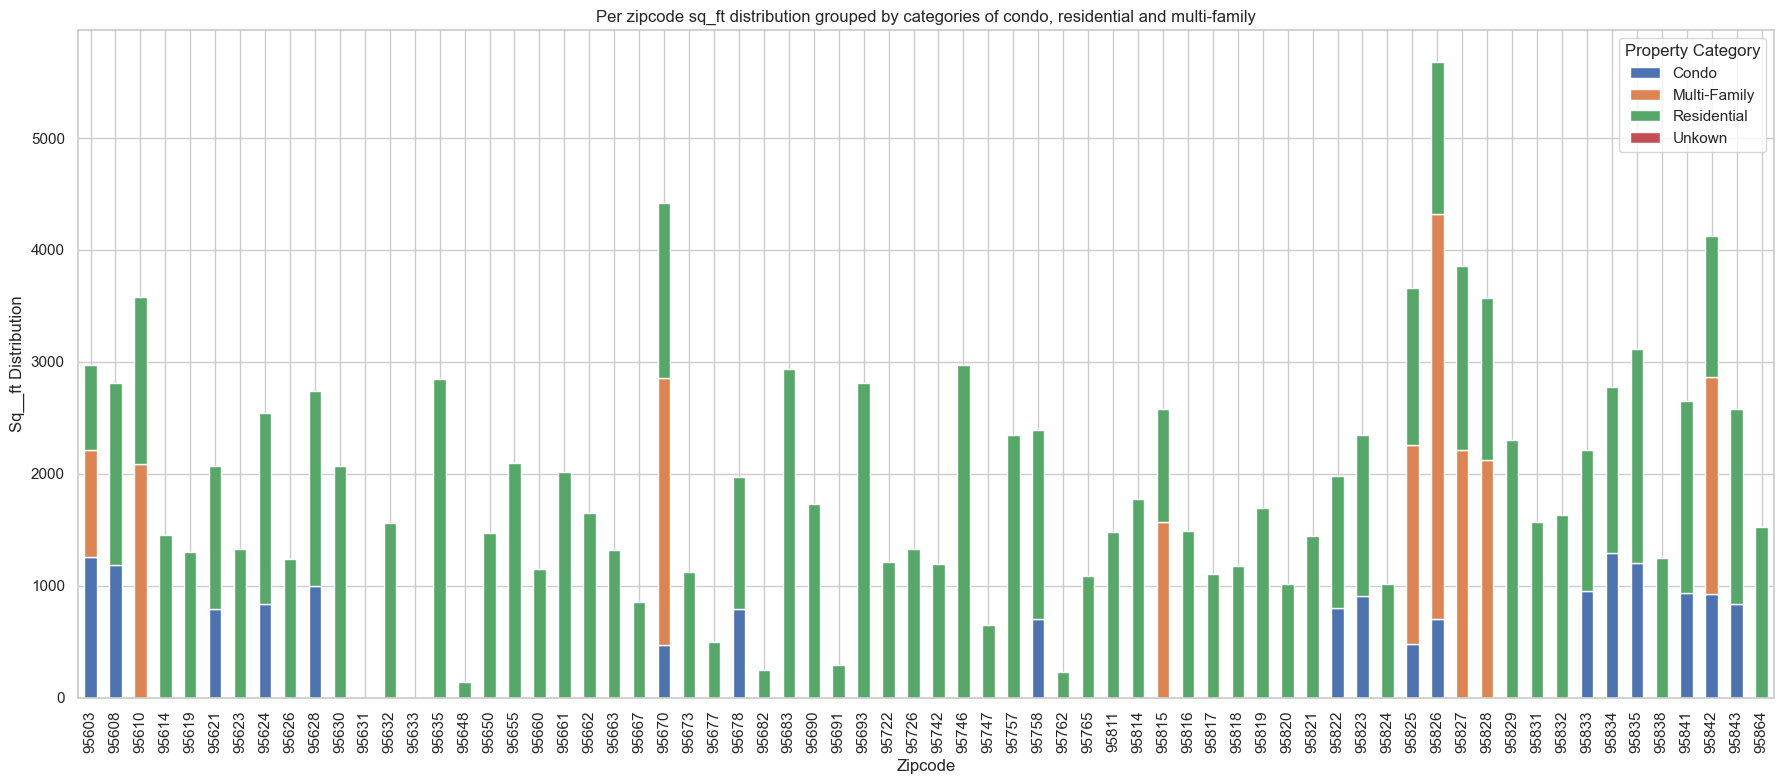

In [53]:
#3. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("Sacramentorealestatetransactions.csv")

#Group data by zipcode and type
groupData = data.groupby(['zip', 'type'])['sq__ft']
data = groupData.mean().unstack()

#Plot
data.plot(kind='bar', stacked=True, figsize=(18, 8))
plt.title('Per zipcode sq_ft distribution grouped by categories of condo, residential and multi-family')
plt.xlabel('Zipcode')
plt.ylabel('Sq__ft Distribution')
plt.legend(title='Property Category')
plt.tight_layout()
plt.show()

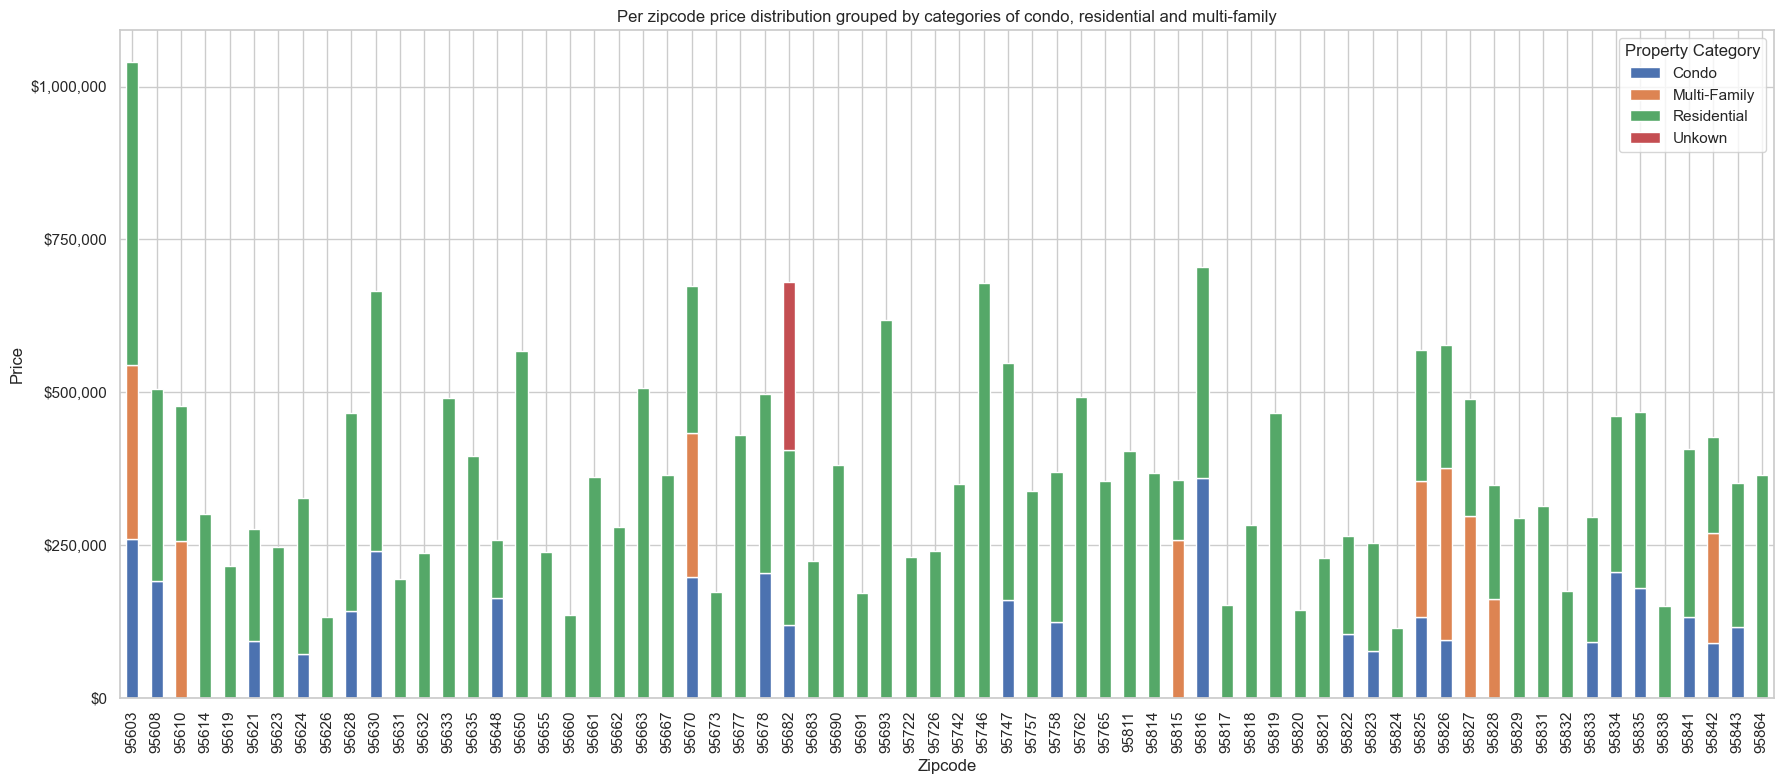

In [69]:
#4. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("Sacramentorealestatetransactions.csv")

#Group data by zipcode and type
groupData = data.groupby(['zip', 'type'])['price']
data = groupData.mean().unstack()

#Plot
data.plot(kind='bar', stacked=True, figsize=(18, 8))
plt.title('Per zipcode price distribution grouped by categories of condo, residential and multi-family')
plt.xlabel('Zipcode')
plt.ylabel('Price')

plt.yticks([0, 250000, 500000, 750000, 1000000], ["$0", "$250,000", "$500,000", "$750,000", "$1,000,000"])
plt.legend(title='Property Category')
plt.tight_layout()
plt.show()

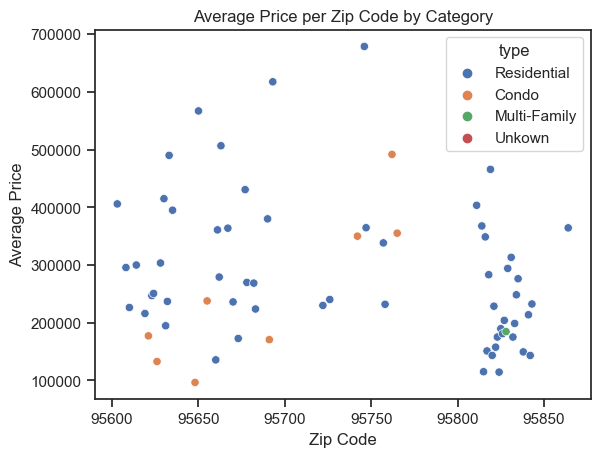

In [29]:
#5. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("Sacramentorealestatetransactions.csv")

avg_price_by_category_zipcode = data.groupby(['type', 'zip'])['price'].mean().unstack()

# Plotting
plt.figure()
average_price_per_zip = data.groupby('zip')['price'].mean().reset_index()
sns.scatterplot(data=average_price_per_zip, x='zip', y='price', hue=data['type'])
plt.xlabel('Zip Code')
plt.ylabel('Average Price') 
plt.title('Average Price per Zip Code by Category')
plt.show()

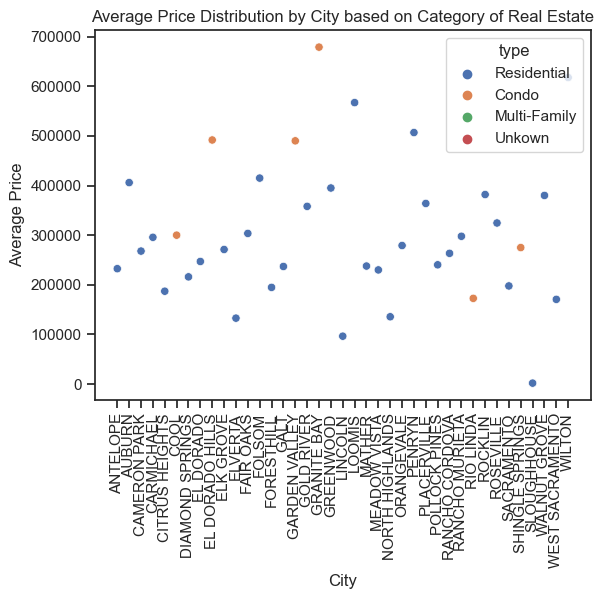

In [28]:
#6. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Sacramentorealestatetransactions.csv")

avg_price_by_category_city = data.groupby(['type', 'city'])['price'].mean().unstack()

# Plotting
plt.figure()
average_price_per_city = data.groupby('city')['price'].mean().reset_index()
average_price_per_city = average_price_per_city.sort_values(by='price')
sns.scatterplot(data=average_price_per_city, x='city', y='price', hue=data['type'])
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Average Price') 
plt.title('Average Price Distribution by City based on Category of Real Estate')  

plt.show()

1. Plot daily gain/loss for January of 2018, annotate the highest daily gain and its date, the highest daily loss and its date in January 2018

2. Make pair plot matrix of January 2018 SP500 data on high, low, adj close and volume

C:\Users\eyezack\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


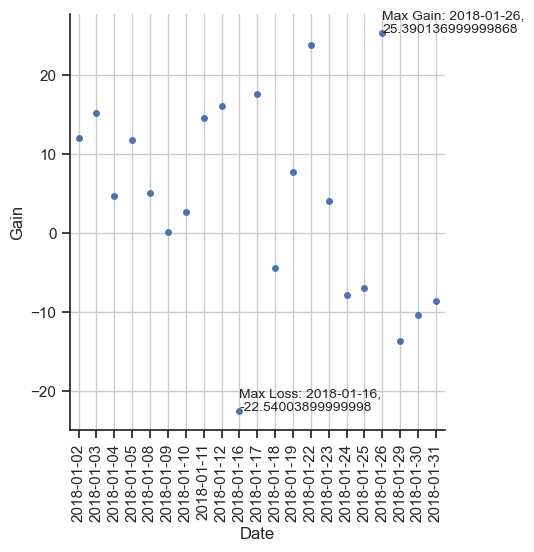

-22.54003899999998 2018-01-16
25.390136999999868 2018-01-26


In [27]:
#1. 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from datetime import datetime 
# all of this creates the dataframe

df = pd.read_csv('SP500.csv')
df = df.loc[(df['Date'] <= '2018-01-31') & (df['Date'] >= '2018-01-01')]

df['Gain'] = df['Close']-df['Open']
gain = df[['Date', 'Gain']]
# try and create the graph first 
sns.set(style="ticks")
g = sns.catplot(x="Date", y="Gain", data=gain)
g.set_xticklabels(rotation=90)

max_gain_date = df.loc[df['Gain'].idxmax(), 'Date']
max_gain = df['Gain'].max()

max_loss_date = df.loc[df['Gain'].idxmin(), 'Date']
max_loss = df['Gain'].min()

plt.text(max_gain_date, max_gain, (str("Max Gain: " + max_gain_date) + ",\n" + str(max_gain)), fontdict=dict(size=10))
plt.text(max_loss_date, max_loss, (str("Max Loss: " + max_loss_date) + ",\n" + str(max_loss)), fontdict=dict(size=10))

plt.grid(linewidth=1)
plt.show()

C:\Users\eyezack\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


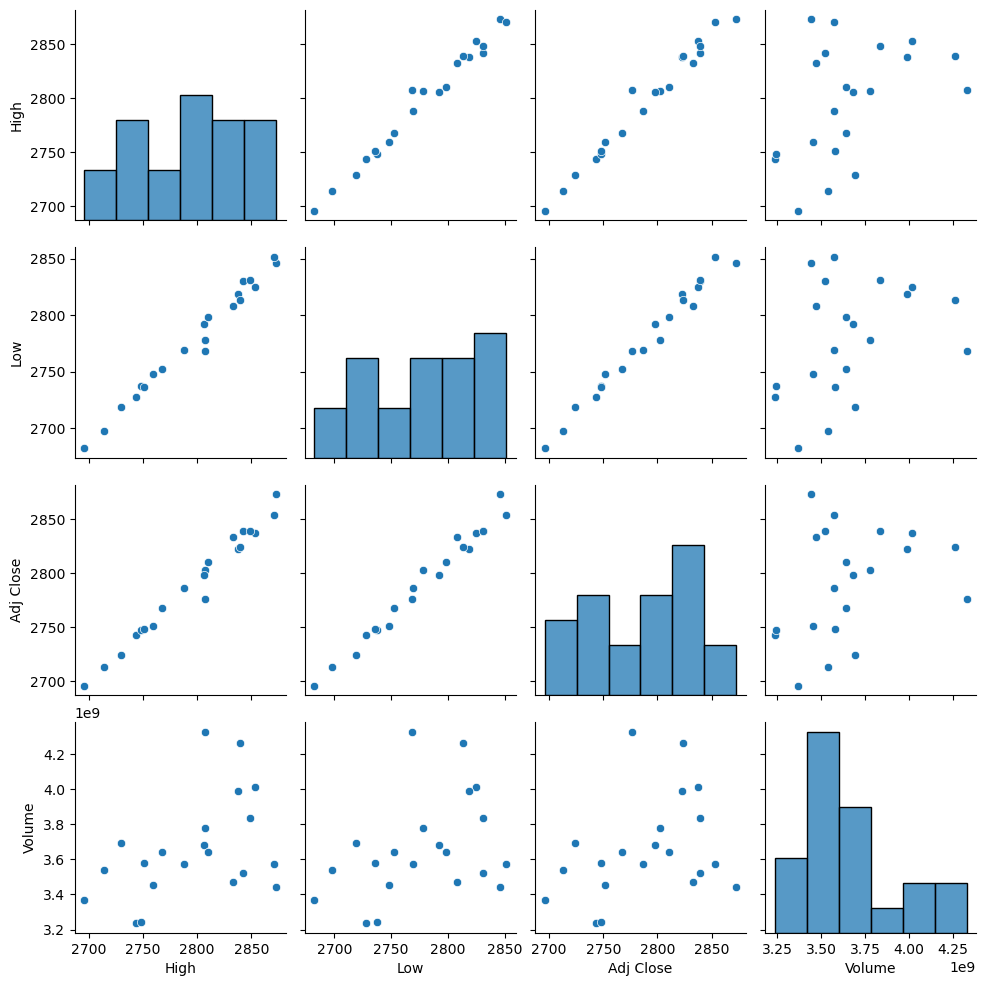

In [2]:
#2. 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from datetime import datetime 
# high, low, adj close and volume
sp500 = pd.read_csv('SP500.csv')
sp500 = sp500.loc[(sp500['Date'] <= '2018-01-31') & (sp500['Date'] >= '2018-01-01')]
df = sp500[['High', 'Low', 'Adj Close', 'Volume']]
g = sns.pairplot(df)